##System check

In [119]:
import sys
osx = sys.platform

##Directory change

In [120]:
import os
if(osx == "win32"):
    os.chdir('C:\Users\dhrre\Desktop\Projects\Handwriting_recognition_using_neural_nets_on_FPGA\Image processing')
else:
    print("OSX ERROR")
os.getcwd()

'C:\\Users\\dhrre\\Desktop\\Projects\\Handwriting_recognition_using_neural_nets_on_FPGA\\Image processing'

##Imports and setup

In [121]:
import numpy as np
from IPython.display import Image
import matplotlib
from matplotlib.pyplot import imshow
from PIL import Image

##Class=> image_processing

In [122]:
class image_processing() : 
    
    def __init__(self) : 
        pass
    
    def convolution(self,image,kernel) : 
        scaling_factor = kernel[0]
        kernel = kernel[1]
        image_width = len(image[0])
        image_height = len(image)
        kernel_width = len(kernel[0])
        kernel_height = len(kernel)

        return_image = []

        def element_wise_matrix_multiplication(matrix1,matrix2,scaling_factor=1) :
            return_value = 0
            for m1_row,m2_row in zip(matrix1,matrix2) :
                for m1_pixel,m2_pixel in zip(m1_row,m2_row) :
                    return_value += int(m1_pixel)*int(m2_pixel)
            return np.uint8(return_value/scaling_factor)
                
        for row in range(image_height - kernel_height + 1) :
            return_image.append([])
            for pixel in range(image_width - kernel_width + 1) :
                image_slice = [[image[i,j] for j in range(pixel,pixel + kernel_width)] for i in range(row,row + kernel_height)]
                #print(image_slice)
                return_image[-1].append(element_wise_matrix_multiplication(image_slice,kernel,scaling_factor))
        return np.array(return_image)
    
    def rgb_to_greyscale(self,image) : 
        return_image = []
        for row in image : 
            return_image.append([])
            for pixel in row :
                try:
                    [r,g,b,s] = pixel
                except ValueError:
                    [r,g,b] = pixel
                return_image[-1].append(np.uint8((int(r)+int(g)+int(b))/3))
        return np.array(return_image)

##Display function

In [123]:
def display(image) : 
    if type(image) is type([]) : 
#         print(image)
#         print(type(image))
        i = len(image)*100 + 11
        for images in image:
            matplotlib.pyplot.subplot(i)
            imshow(images,cmap=matplotlib.pyplot.get_cmap('gray'))
            i = i+1
    else : 
        % matplotlib inline
        imshow(image,cmap=matplotlib.pyplot.get_cmap('gray'))

##Original Image Display

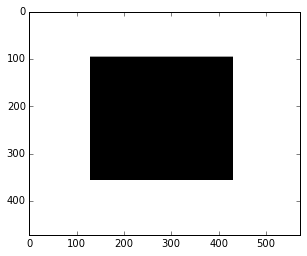

In [124]:
image = np.array(Image.open('sample images/sample_image.jpg')) 

#imshow(image,cmap=matplotlib.pyplot.get_cmap('grey'))
impr = image_processing()
image = impr.rgb_to_greyscale(image)

display(image)


##Smoothened Image Display

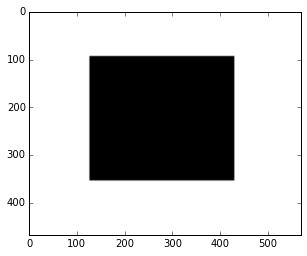

In [125]:
def gaussian_filter(self,image) : 
    kernel = [273,[[1,4 ,7 ,4 ,1],
                [4,16,26,16,4],
                [7,26,41,26,7],
                [4,16,26,16,4],
                [1,4 ,7 ,4 ,1]]]
    processed_image = self.convolution(image,kernel)
    return processed_image

image_processing.gaussian_filter = gaussian_filter
impr = image_processing()
im = impr.gaussian_filter(image)
display(im)
image = im

##Vertical Edge Detection (Only detects black to white without smoothening filter)

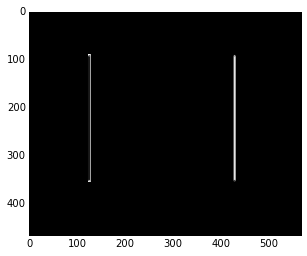

In [126]:
def vertical_edge_detection(self,image) : 
    kernel = [1,[[-1,0,1],
                 [-1,0,1],
                 [-1,0,1]]]
    processed_image = self.convolution(image,kernel)
    return processed_image
    
image_processing.vertical_edge_detection = vertical_edge_detection
impr = image_processing()
im = impr.vertical_edge_detection(image)
display(im)

##Horizontal Edge Detection (Only detects black to white without smoothening filter)

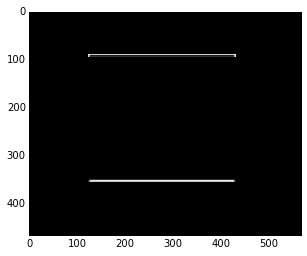

In [127]:
def horizontal_edge_detection(self,image) : 
    kernel = [1,[[-1,-1,-1],
                 [ 0, 0, 0],
                 [ 1, 1, 1]]]
    processed_image = self.convolution(image,kernel)
    return processed_image
    
image_processing.horizontal_edge_detection = horizontal_edge_detection
impr = image_processing()
im = impr.horizontal_edge_detection(image)
display(im)

##Horizontal plus Vertical Edge Detection (Only detects black to white without smoothening filter)

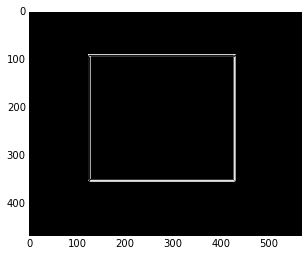

In [128]:
def horizontal_plus_vertical_edge_detection(self,image) :
    horizontal = self.horizontal_edge_detection(image)
    vertical = self.vertical_edge_detection(image)
    rows = len(horizontal)
    columns = len(horizontal[0])
    
    return_array = []
    for i in range(rows) :
        return_array.append([])
        for j in range(columns) : 
            return_array[-1].append(np.uint8(int(horizontal[i,j]) + int(vertical[i,j])))
    return np.array(return_array)

image_processing.horizontal_plus_vertical_edge_detection = horizontal_plus_vertical_edge_detection
impr = image_processing()
im = Image.fromarray(impr.horizontal_plus_vertical_edge_detection(image))
display(im)

##Gaussian Blur / Smoothening

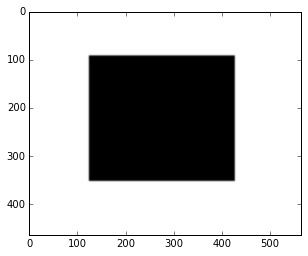

In [129]:
def gaussian_filter(self,image) : 
    kernel = [273,[[1,4 ,7 ,4 ,1],
                [4,16,26,16,4],
                [7,26,41,26,7],
                [4,16,26,16,4],
                [1,4 ,7 ,4 ,1]]]
    processed_image = self.convolution(image,kernel)
    return processed_image

image_processing.gaussian_filter = gaussian_filter
impr = image_processing()
im = impr.gaussian_filter(image)
display(im)

## Full convolution

In [130]:
def full_convolution(self,image,*args):
    all_kernels = list(args)
#     print(all_kernels)

    image_width = len(image[0])
    image_height = len(image)
    
    
    def element_wise_matrix_multiplication(matrix1,matrix2,scaling_factor=1) :
        return_value = 0
        for m1_row,m2_row in zip(matrix1,matrix2) :
            for m1_pixel,m2_pixel in zip(m1_row,m2_row) :
                return_value += int(m1_pixel)*int(m2_pixel)
        return np.uint8(return_value/scaling_factor)
    
    def slice_and_multiply(image,kernel,scaling_factor):
        
        [kernel_width,kernel_height] = [len(kernel[0]),len(kernel)]
        
        return_image = []
        for row in range(image_height - kernel_height + 1) :
            return_image.append([])
            for pixel in range(image_width - kernel_width + 1) :
                image_slice = [[image[i,j] for j in range(pixel,pixel + kernel_width)] for i in range(row,row + kernel_height)]
                #print(image_slice)
                return_image[-1].append(element_wise_matrix_multiplication(image_slice,kernel,scaling_factor))
        return np.array(return_image)
    
    def slice_and_multiply_together(image,all_kernels):
        full_kernel = all_kernels[1]
        kernel = full_kernel[1]
        [kernel_width,kernel_height] = [len(kernel[0]),len(kernel)]
        
        return_image = []
        for row in range(image_height - kernel_height + 1) :
            return_image.append([])
            for pixel in range(image_width - kernel_width + 1) :
                image_slice = [[image[i,j] for j in range(pixel,pixel + kernel_width)] for i in range(row,row + kernel_height)]
                #print(image_slice)
                temp = 0
                for full_kernel in all_kernels:
                    kernel = full_kernel[1]
                    temp = np.uint8(temp|element_wise_matrix_multiplication(image_slice,kernel,full_kernel[0]))
                return_image[-1].append(temp)
        return np.array(return_image)
    
    full_kernel = all_kernels[0]
    
    kernel = full_kernel[1]

#     kernel_width = len(kernel[0])
#     kernel_height = len(kernel)
  
    kernel_specs = [len(kernel[0]),len(kernel)]                                #[kernel_width,kernel_height]
    
    if(len(all_kernels) >1):
        for full_kernel in all_kernels[1:]:
            kernel = full_kernel[1]
            kernel_specs_ = [len(kernel[0]),len(kernel)]                        #[kernel_width,kernel_height]
            if(kernel_specs == kernel_specs_):
                flag = 1
#                 print ("flag recvd 1")
            else:
                flag = 0
#                 print ("flag recvd 0")
                break
        if flag == 0:
#             print ("entering one-kernel-at-a-time mode")
            temp = []
            for full_kernel in all_kernels:
#                 print(full_kernel)
#                 print(full_kernel[1])
                im = slice_and_multiply(image,full_kernel[1],full_kernel[0])      #image, kernel, scaling_factor
#                 print("----")
                temp.append(im)
            return(temp)
        if flag ==1:
#             print("entering all-kernels-together-mode")
            im = slice_and_multiply_together(image,all_kernels)       #image, all_kernels
            return(im)
    else:
#         print("just 1 kernel")
        return slice_and_multiply(image,full_kernel[1],full_kernel[0])             #image, kernel, scaling_factor

image_processing.full_convolution = full_convolution

#Other variants for using Full convolution:-

#vertical_edge_full_convolution

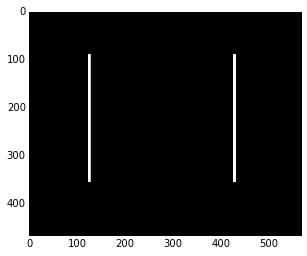

In [131]:
def vertical_edge_full_convolution(self,image) : 
    kernel1 = [1,[[-1,0,1],
                 [-1,0,1],
                 [-1,0,1]]]
    kernel2 = [1,[[1,0,-1],
                 [1,0,-1],
                 [1,0,-1]]]
    processed_image = self.full_convolution(image,kernel1,kernel2)
    return processed_image

image_processing.vertical_edge_full_convolution = vertical_edge_full_convolution

impr = image_processing()
im = impr.vertical_edge_full_convolution(image)
display(im)

#horizontal_edge_full_convolution

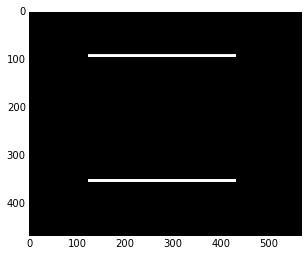

In [132]:
def horizontal_edge_full_convolution(self,image) : 
    kernel1 = [1,[[-1,-1,-1],
                 [0,0,0],
                 [1,1,1]]]
    kernel2 = [1,[[1,1,1],
                 [0,0,0],
                 [-1,-1,-1]]]
    processed_image = self.full_convolution(image,kernel1,kernel2)
    return processed_image

image_processing.horizontal_edge_full_convolution = horizontal_edge_full_convolution

impr = image_processing()
im  = impr.horizontal_edge_full_convolution(image)
display(im)

#complete_edge_full_convolution

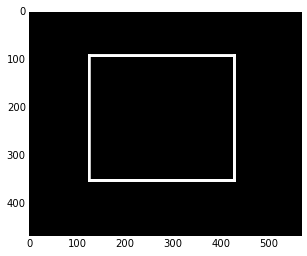

In [133]:
def complete_edge_full_convolution(self,image) : 
    kernel1 = [1,[[-1,0,1],
                 [-1,0,1],
                 [-1,0,1]]]
    kernel2 = [1,[[1,0,-1],
                 [1,0,-1],
                 [1,0,-1]]]
    kernel3 = [1,[[-1,-1,-1],
                 [0,0,0],
                 [1,1,1]]]
    kernel4 = [1,[[1,1,1],
                 [0,0,0],
                 [-1,-1,-1]]]
    processed_image = self.full_convolution(image,kernel1,kernel2,kernel3,kernel4)
    return processed_image

image_processing.complete_edge_full_convolution = complete_edge_full_convolution

impr = image_processing()
im = impr.complete_edge_full_convolution(image)
display(im)

In [134]:
image = im

#Segmentation:

##Transpose Function

In [135]:
def transpose(image):
    temp = []
    for i in range(len(image[0])):
        temp.append([])
        for j in range(len(image)):
            temp[-1].append(image[j][i])
    return np.array(temp)

In [136]:
##TEMPORARY
def print_(ch):
    for val in ch:
        print(val)

In [171]:
##TEMPORARY
pi = [[1,1,1,1],[1,1,1,1],[1,0,0,1],[1,1,1,1]]
print_(pi)

[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 0, 0, 1]
[1, 1, 1, 1]


##Check_row_for_obstruction function

In [190]:
def check_row_for_obstruction(im,row,mode=1):
    im_slice = im[row]
    k = im_slice[0]
    for i in range(1,len(im_slice)):
        if(k != im_slice[i]):
            return (mode==1)
    else:
        return (mode!=1)

##Sweep function

In [191]:
def sweep(image,mode,x1=0):
    image_ = transpose(image)
    display(image)
    if(mode==1):   #Right to left sweep
        for i in range(len(image_)):
            if(check_row_for_obstruction(image_,i)):
                break
        else:
            print("thenga")
        return i
    if(mode==2):   #Up to down sweep
        for i in range(len(image)):
            if(check_row_for_obstruction(image,i)):
                break
        else:
            print("thenga")
        return i
    if(mode==3):   #Down to up sweep
        for i in range(len(image)):
            if(check_row_for_obstruction(image,len(image)-1-i)):
                break
        else:
            print("thenga")
        return len(image)-1-i
    if(mode==4):   #Left to right sweep
        for i in range(x1,len(image_)):
            if(check_row_for_obstruction(image_,i,2)):
                break
        else:
            print("thenga")
        return i-1
    

##Crop_out function

In [214]:
def crop_out(obj_dim):
    border = 20
    obj_dim = [obj_dim[0]-border,obj_dim[1]+border,obj_dim[2]-border,obj_dim[3]+border]
#     print(obj_dim)
    obj_dim = [max(0,x) for x in obj_dim]
#     print(obj_dim)
    letter_image = image[obj_dim[2]:obj_dim[3]]
    letter_image = np.array([row[obj_dim[0]:obj_dim[1]] for row in letter_image])
    display(letter_image)

##Scan_and_crop function

In [215]:
def scan_and_crop():
    x1 = sweep(image,1)
    x2 = sweep(image,4,x1)
    y1 = sweep(image,2)
    y2 = sweep(image,3)
    print("cropped values are:")
    print(x1,x2,y1,y2)
    object_dimensions = [x1,x2,y1,y2]
    crop_out(object_dimensions)

cropped values are:
(122, 429, 90, 355)


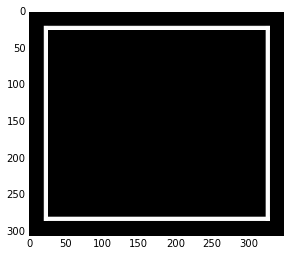

In [216]:
scan_and_crop()